In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [12]:
path = "F:\\2020 Working Folder\\0928 JOM ZEK100\\1214_Revision\\Simulation Cases\\"
intepolate_data = pd.read_csv('intepolate_data.csv')
cases = ['CRD','TRD','CTD','TTD','C45','T45','CND']
r2_mean = 0
r2_list = []
for index, case in enumerate(cases):
    case_table = pd.read_csv(path+case[0]+'-'+case[1:]+'_001\\STR_STR.OUT',sep='\s+',header=0)
    intp_table = intepolate_data[[case+'_eps',case+'_sig']].dropna(axis=0)
    if len(case_table[['Evm','Svm']]) >= len(intp_table):
        case_table = case_table[['Evm','Svm']][0:len(intp_table)]
    else:
        case_table = case_table[['Evm','Svm']]
        intp_table = intp_table[[case+'_eps',case+'_sig']][0:len(case_table)]
    r2 = r2_score(intp_table[case+'_sig'].loc[1:],case_table['Svm'].loc[1:])
    print(r2)
    r2_list.append(r2)
    r2_mean += r2
average_r2 = r2_mean/7
fileout = open("R2_file",'w')
fileout.write('R2 values for all cases:\n')
for case in cases:
    fileout.write(case+'\t')
fileout.write('\n')
for r2r2 in r2_list:
    fileout.write(str(r2r2)+'\t')
fileout.write('\n')
fileout.write('Average R2 values:\n')
fileout.write(str(average_r2))
fileout.close()

-0.1482777754825808
-0.24182993693046084
-3.1668262240399567
-0.4652658779454286
0.22939667777177863
-0.674159560603997
-1.7037784354439576


In [3]:
fileout = open("R2_log",'a')
for r2r2 in r2_list:
    fileout.write(str(r2r2)+'\t')
fileout.write(str(average_r2))
fileout.write('\n')
fileout.close()

In [40]:
intp = intp_table[case+'_sig'].loc[1:].to_numpy()

In [41]:
casei = case_table['Svm'].loc[1:].to_numpy()

In [21]:
intp

array([125.6428571, 138.9977117, 144.4897025, 149.9816934, 155.4736842,
       159.167147 , 161.3285303, 163.4899135, 165.6512968, 167.8126801])

In [22]:
casei

array([152.59, 158.06, 163.2 , 168.28, 172.67, 177.04, 181.22, 185.09,
       188.84, 192.59])

In [44]:
np.sum(np.square(intp/150-casei/150))/7

0.0279583529859207

In [31]:
np.sum(np.square(intp/200-np.mean(intp)/200))

0.04071561982999052

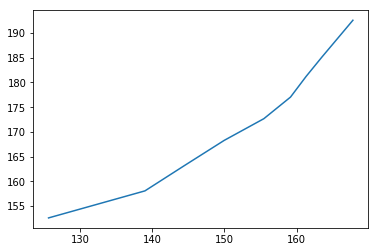

In [29]:
plt.plot(intp,casei)

In [32]:
1-np.sum(np.square(intp/200-casei/200))/np.sum(np.square(intp/200-np.mean(intp)/200))

-1.703778435443959

In [45]:
intp = intp_table[case+'_sig']

In [47]:
intp

0       0.000000
1     125.642857
2     138.997712
3     144.489702
4     149.981693
5     155.473684
6     159.167147
7     161.328530
8     163.489914
9     165.651297
10    167.812680
Name: CND_sig, dtype: float64

In [49]:
r2+=(intp_table[1]/150-case_table[1]/150)^2

KeyError: 1

In [51]:
intp = intp_table[case+'_sig'].loc[1:]

In [58]:
intp.iloc[10]

IndexError: single positional indexer is out-of-bounds